# Create all the utilities functions

In [1]:
import re

# Function to filter valid tweets or not for this process
# Tweets that start with RT @ means a tweet reply
def isReplyTweet(tweet):
    if (re.search(r"(^([@]{1}[a-zA-Z0-9_]{3}))|(^([RT ]{3}[@]))+", tweet, re.IGNORECASE) != None):
        return True
    return False


# Create a function in order to check if the token is one of the special characters or not
def isSpecialChar(char):
    isSpecialChar = False
    #Define an array of special characteres
    specialChars = ['.', ',', ';', '...', '!', '?', ':', '/', '|', '\\', '&', '(', ')', '[', ']', '{', '}', '-', '_', '+', '=', '*', '%', '$', '@', '\'', '<', '>', '"']
    
    if char in specialChars:
        isSpecialChar = True
    
    return isSpecialChar


# Create a function in order to check if the token is one of the prepositions of the special words or not
def isUnnecessary(text):
    isUnnecessary = False
    #Define an array of special characteres
    isUnnecessaryText = ['a', 'the', 'of', 'it', 's', 're', 'are', 'is', 'll', 'be', 'to', 'i', 'all', 'do', 'does', 'did', 'will']
    
    if text in isUnnecessaryText:
        isUnnecessary = True
    
    return isUnnecessary


# Create a function in order to generate the matrix with 0 or 1 for the specific words
def isWordPresent(text, words):
    isPresent = False
    if text in words:
        isUnnecessary = True
    
    return isUnnecessary


def isEmojiPresent(text):
    # a_list = ['😤 😢 😭 😦 😧 😨 😩 🤯 😬 😰 😱😍 🤔 🙈 me así, bla es se 😌 ds 💕👭👙 🔪 🗡 ⚔️ ♾ 🏴‍☠️']
    if (len(re.findall(r'[^\w\s,]', text)) > 0):
        return True
    return False

def tokensHasEmoji(tokens):
    for token in tokens:
        if (isEmojiPresent(token)):
            return True
        
    return False

# Read the database file

> First of all, I've created a test file with around 3 thousands registers. In order to read the data from the json file it is necessary to create a panda dataframe to start process the tweets.

In [2]:
import pandas as pd
import json

# read the data
dataset = pd.read_json('../database/tweetsTest.json', lines=True)

# load the data in a dataframe
data = pd.DataFrame(dataset)

# show the last 10 tuples to verify
#data.tail(10)

> Create a dictionary using the user.id as key and its __tweets__ as value. So, as result I have the **tweets** separately by user

In [3]:
import json
from collections import defaultdict

userTweetsDict = dict()

for row in data.itertuples(index=True, name='Pandas'):
    user = getattr(row, "user")
    userId = user["_id"]['$numberLong']
    #print(userId)
    #print(userTweetsDict)
    #print(userTweetsDict.get(userId))
    if userTweetsDict.get(userId) == None:
        tweets = list()
        if not (isReplyTweet(getattr(row, "text"))):
            tweets.append({"text": getattr(row, "text"), "isPositiveTweet": getattr(row, "isPositiveTweet")})
            userTweetsDict[userId] = tweets
    else:
        tweets = userTweetsDict.get(userId)
        if not (isReplyTweet(getattr(row, "text"))):
            tweets.append({"text": getattr(row, "text"), "isPositiveTweet": getattr(row, "isPositiveTweet")})
            userTweetsDict[userId] = tweets
    
    print(userTweetsDict)

    #userTweetsDict["$userId"] = userTweetsDict["$userId"].add(user)

    #userId = getattr(user, "$numberLong")
    #print(userI)
    
#print(data['isPositiveTweet'])
#print(data['user'][0])
#type(data['user'][0])
#print(type(data['user'][0]["_id"]))
#print(data['user'][0]["_id"]['$numberLong'])

#for i in range(0, len(data['user'])):
    #user = json.dumps(data['user'][i], ensure_ascii=False)
    #print(user)

    # Parse JSON into an object with attributes corresponding to dict keys.
    #x = json.loads(user, object_hook=lambda d: namedtuple('X', d.keys())(*d.values()))
    
    # if x._id == 455035004:
    #    print("ok")


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



> Just to check if the dictionary works fine, perform a loop to print all the data

In [4]:
for k, v in userTweetsDict.items():
    print('key: ' + k)
    print('Value: ' + str(v))
    print('length of twwets: ' + str(len(v)))

key: 2875609407
Value: [{'text': 'Now ... Will this be investigated at all or will it be one of those ¯\\_(ツ)_/¯ things?', 'isPositiveTweet': False}]
length of twwets: 1
key: 1621118984
Value: [{'text': 'The only things I’ll RT are things that have to do with money, good grades, clear skin and happiness bc I need to think it into existence', 'isPositiveTweet': True}]
length of twwets: 1
key: 211418850
Value: [{'text': 'a-and to think she got a 20k like tweet clout from ME\n\ni am: betrayed', 'isPositiveTweet': True}]
length of twwets: 1
key: 3329797803
Value: [{'text': 'On august 6th, 2018 a woman that was kind, loving and the best grandma anyone could ask for was set free of all her… https://t.co/LkIPpfaboX', 'isPositiveTweet': True}]
length of twwets: 1
key: 222518495
Value: [{'text': 'Do you know why there isn’t this sort of push-back with the investigation into Dr Strauss and #SexualAbuse? \n-Strau… https://t.co/9hnCxDQztd', 'isPositiveTweet': False}]
length of twwets: 1
key: 82168

key: 2210195286
Value: [{'text': 'have people in movies never heard of putting your phone on silent cus in every fucking scenario where they have to… https://t.co/UcWjLjz2FA', 'isPositiveTweet': False}]
length of twwets: 1
key: 3356019641
Value: [{'text': 'NEWS: Suicide bomb attack kills at least three Somali soldiers outside Mogadishu', 'isPositiveTweet': False}]
length of twwets: 1
key: 19929092
Value: [{'text': 'The bad luck @ArmadaUGS encounters while travelling actually blows my mind. No other frequent traveler I follow run… https://t.co/xfkuM3hCh4', 'isPositiveTweet': False}]
length of twwets: 1
key: 3143504389
Value: [{'text': 'I live across the world tied to a disease that no one could cure. I just want to be noticed and be appreciated. I l… https://t.co/AhwgFFFx4M', 'isPositiveTweet': True}]
length of twwets: 1
key: 434559101
Value: [{'text': 'It’s amazing how many people talk to you when you’re glowing. They can sense your happiness and want to know how they can get it, too.'

# Tokenization

> Start the tokenization process, by creating an array of phrases. I mean, spliting by pontuation

In [5]:
import nltk
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

for k, v in userTweetsDict.items():
    #print('key: ' + k)
    #print('Value: ' + str(v))
    #print('length of twwets: ' + str(len(v)))
    for i in range(0, len(v)):
        tweet = v[i].get("text")
        v[i]["text"] = sent_tokenize(tweet)
        print(v[i].get("text"))

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/edilsonjustiniano/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
['Now ... Will this be investigated at all or will it be one of those ¯\\_(ツ)_/¯ things?']
['The only things I’ll RT are things that have to do with money, good grades, clear skin and happiness bc I need to think it into existence']
['a-and to think she got a 20k like tweet clout from ME\n\ni am: betrayed']
['On august 6th, 2018 a woman that was kind, loving and the best grandma anyone could ask for was set free of all her… https://t.co/LkIPpfaboX']
['Do you know why there isn’t this sort of push-back with the investigation into Dr Strauss and #SexualAbuse?', '-Strau… https://t.co/9hnCxDQztd']
['THIS WAS SO CUTE WTFSJDJXJDJDJJJAKA thank you!!!!!!!!!!!', '💖💕💝💗💞']
['Is it weird that I’m only 17 but I feel like I’ll end up lonely?', 'I mean I’m already at the point that I just wanna… https://t.co/wU2yjW2ewJ']
['Open bar happy hour at the work co

> Now get the tokenized phrases and performa **word_tokenization**, I mean split the phrases by word

In [6]:
from nltk.tokenize import word_tokenize

for k, v in userTweetsDict.items():
    #print('key: ' + k)
    #print('Value: ' + str(v))
    #print('length of twwets: ' + str(len(v)))
    for i in range(0, len(v)):
        tweet = v[i].get("text")
        print(v[i].get("text"))
        tokenized_docs = [word_tokenize(doc) for doc in tweet]
        print(tokenized_docs)
        

['Now ... Will this be investigated at all or will it be one of those ¯\\_(ツ)_/¯ things?']
[['Now', '...', 'Will', 'this', 'be', 'investigated', 'at', 'all', 'or', 'will', 'it', 'be', 'one', 'of', 'those', '¯\\_', '(', 'ツ', ')', '_/¯', 'things', '?']]
['The only things I’ll RT are things that have to do with money, good grades, clear skin and happiness bc I need to think it into existence']
[['The', 'only', 'things', 'I', '’', 'll', 'RT', 'are', 'things', 'that', 'have', 'to', 'do', 'with', 'money', ',', 'good', 'grades', ',', 'clear', 'skin', 'and', 'happiness', 'bc', 'I', 'need', 'to', 'think', 'it', 'into', 'existence']]
['a-and to think she got a 20k like tweet clout from ME\n\ni am: betrayed']
[['a-and', 'to', 'think', 'she', 'got', 'a', '20k', 'like', 'tweet', 'clout', 'from', 'ME', 'i', 'am', ':', 'betrayed']]
['On august 6th, 2018 a woman that was kind, loving and the best grandma anyone could ask for was set free of all her… https://t.co/LkIPpfaboX']
[['On', 'august', '6th', '

[['Truee❤️❤️']]
['Niggas be selling drugs and be like 29 with no insurance, credit or anything.', 'How you happy with life?!', 'Lmao']
[['Niggas', 'be', 'selling', 'drugs', 'and', 'be', 'like', '29', 'with', 'no', 'insurance', ',', 'credit', 'or', 'anything', '.'], ['How', 'you', 'happy', 'with', 'life', '?', '!'], ['Lmao']]
['Ok but girls who undergo fat shaming AND the ones who are struggling with body dysmorphia/eating disorders should b… https://t.co/se2adVQt8t']
[['Ok', 'but', 'girls', 'who', 'undergo', 'fat', 'shaming', 'AND', 'the', 'ones', 'who', 'are', 'struggling', 'with', 'body', 'dysmorphia/eating', 'disorders', 'should', 'b…', 'https', ':', '//t.co/se2adVQt8t']]
["You growing up so fast but I'm so proud to say that you growing up with us.", "I'm so proud of all your achievements.… https://t.co/uZ6aaHrK0g"]
[['You', 'growing', 'up', 'so', 'fast', 'but', 'I', "'m", 'so', 'proud', 'to', 'say', 'that', 'you', 'growing', 'up', 'with', 'us', '.'], ['I', "'m", 'so', 'proud', 'of'

In [7]:
#for k, v in userTweetsDict.items():
    #print('key: ' + k)
    #print('Value: ' + str(v))
    #print('length of twwets: ' + str(len(v)))
#    for i in range(0, len(v)):
#        tweet = v[i].get("text")
#        print(tweet)
        

> Remove the special characteres from the twitter's text

In [8]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemmer=WordNetLemmatizer()
           

for k, v in userTweetsDict.items():
    #print('key: ' + k)
    #print('Value: ' + str(v))
    #print('length of twwets: ' + str(len(v)))
    for i in range(0, len(v)):
        tweet = v[i].get("text")
        tokenized_docs = [word_tokenize(doc) for doc in tweet]
        v[i]["text"] = tokenized_docs
        print(v[i]["text"])
        for j in range(0, len(tokenized_docs)):
            print("Tokenized" + str(tokenized_docs[j]))
            isUnnecessaryToRemove = list()
            specialCharsToRemove = list()
            for k in range(0, len(tokenized_docs[j])):
                if (isSpecialChar(tokenized_docs[j][k])):
                    print ('is special Char: ' + str(tokenized_docs[j][k]))
                    specialCharsToRemove.append(tokenized_docs[j][k])
                    
                # tokenized_docs[j][k] = tokenized_docs[j][k].lower()
                # lemmatize the word
                tokenized_docs[j][k] = lemmer.lemmatize(tokenized_docs[j][k].lower())
                if (isUnnecessary(tokenized_docs[j][k])):
                    print ('is Unnecessary Char: ' + str(tokenized_docs[j][k]))
                    isUnnecessaryToRemove.append(tokenized_docs[j][k])
                #print('Token: ' + str(tokenized_docs[j][k]))
            
            for specialChar in isUnnecessaryToRemove:
                while specialChar in tokenized_docs[j]:
                    tokenized_docs[j].remove(specialChar)
            
            for specialChar in specialCharsToRemove:
                while specialChar in tokenized_docs[j]:
                    tokenized_docs[j].remove(specialChar)
                    
            print(tokenized_docs[j])

        v[i]["text"] = tokenized_docs
        print(tokenized_docs)



[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/edilsonjustiniano/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[['Now', '...', 'Will', 'this', 'be', 'investigated', 'at', 'all', 'or', 'will', 'it', 'be', 'one', 'of', 'those', '¯\\_', '(', 'ツ', ')', '_/¯', 'things', '?']]
Tokenized['Now', '...', 'Will', 'this', 'be', 'investigated', 'at', 'all', 'or', 'will', 'it', 'be', 'one', 'of', 'those', '¯\\_', '(', 'ツ', ')', '_/¯', 'things', '?']
is special Char: ...
is Unnecessary Char: will
is Unnecessary Char: be
is Unnecessary Char: all
is Unnecessary Char: will
is Unnecessary Char: it
is Unnecessary Char: be
is Unnecessary Char: of
is special Char: (
is special Char: )
is special Char: ?
['now', 'this', 'investigated', 'at', 'or', 'one', 'those', '¯\\_', 'ツ', '_/¯', 'thing']
[['now', 'this', 'investigated', 'at', 'or', 'one', 'those', '¯\\_', 'ツ', '_/¯', 'thing']]
[['The', 'only', 'things', 'I', '’', 'll', 'RT', 'are', 'things', 'that', 'have', 'to', 'd

[['happiness', 'choice'], ['important', 'reminder', 'http', '//t.co/22k1m6iarp']]
[['I', 'liked', 'a', '@', 'YouTube', 'video', 'https', ':', '//t.co/BaVnh8MpOd', 'FORTNITE', '[', 'Live', 'stream', ']', 'Baba', 'Clan', 'sempre', 'ON||Abruzzo', 'ITA||']]
Tokenized['I', 'liked', 'a', '@', 'YouTube', 'video', 'https', ':', '//t.co/BaVnh8MpOd', 'FORTNITE', '[', 'Live', 'stream', ']', 'Baba', 'Clan', 'sempre', 'ON||Abruzzo', 'ITA||']
is Unnecessary Char: i
is Unnecessary Char: a
is special Char: @
is special Char: :
is special Char: [
is special Char: ]
['liked', 'youtube', 'video', 'http', '//t.co/bavnh8mpod', 'fortnite', 'live', 'stream', 'baba', 'clan', 'sempre', 'on||abruzzo', 'ita||']
[['liked', 'youtube', 'video', 'http', '//t.co/bavnh8mpod', 'fortnite', 'live', 'stream', 'baba', 'clan', 'sempre', 'on||abruzzo', 'ita||']]
[['I', 'would', 'kill', 'myself', 'but', 'i', '’', 'm', 'tired', '.']]
Tokenized['I', 'would', 'kill', 'myself', 'but', 'i', '’', 'm', 'tired', '.']
is Unnecessary C

Tokenized['Jk', 'do', "n't", 'it', 'dont', 'want', 'you', 'to', 'die']
is Unnecessary Char: do
is Unnecessary Char: it
is Unnecessary Char: to
['jk', "n't", 'dont', 'want', 'you', 'die']
[['you'], ['jk', "n't", 'dont', 'want', 'you', 'die']]
[['Check', 'out', 'my', 'broadcast', 'from', 'my', 'PlayStation', '4', '!'], ['#', 'PS4live', '(', 'Dead', 'by', 'Daylight', ')', 'live', 'at', 'https', ':', '//t.co/JyeC6GNxYv']]
Tokenized['Check', 'out', 'my', 'broadcast', 'from', 'my', 'PlayStation', '4', '!']
is special Char: !
['check', 'out', 'my', 'broadcast', 'from', 'my', 'playstation', '4']
Tokenized['#', 'PS4live', '(', 'Dead', 'by', 'Daylight', ')', 'live', 'at', 'https', ':', '//t.co/JyeC6GNxYv']
is special Char: (
is special Char: )
is special Char: :
['#', 'ps4live', 'dead', 'by', 'daylight', 'live', 'at', 'http', '//t.co/jyec6gnxyv']
[['check', 'out', 'my', 'broadcast', 'from', 'my', 'playstation', '4'], ['#', 'ps4live', 'dead', 'by', 'daylight', 'live', 'at', 'http', '//t.co/jyec6g

[['It', "'s", 'true', '.'], ['#', 'HappyBirthdayShawn']]
Tokenized['It', "'s", 'true', '.']
is Unnecessary Char: it
is special Char: .
["'s", 'true']
Tokenized['#', 'HappyBirthdayShawn']
['#', 'happybirthdayshawn']
[["'s", 'true'], ['#', 'happybirthdayshawn']]
[['6ix9ine', 'Baby', 'Mother', 'Kicks', 'Him', 'Out', 'of', 'Bed', 'on', 'Instagram', 'Live', '!'], ['https', ':', '//t.co/2OnTfIKjen']]
Tokenized['6ix9ine', 'Baby', 'Mother', 'Kicks', 'Him', 'Out', 'of', 'Bed', 'on', 'Instagram', 'Live', '!']
is Unnecessary Char: of
is special Char: !
['6ix9ine', 'baby', 'mother', 'kick', 'him', 'out', 'bed', 'on', 'instagram', 'live']
Tokenized['https', ':', '//t.co/2OnTfIKjen']
is special Char: :
['http', '//t.co/2ontfikjen']
[['6ix9ine', 'baby', 'mother', 'kick', 'him', 'out', 'bed', 'on', 'instagram', 'live'], ['http', '//t.co/2ontfikjen']]
[['I', 'ate', 'coffee', 'and', 'kahlua', 'flavored', 'frozen', 'custard', 'today', ',', 'I', 'want', 'to', 'eat', 'it', 'every', 'single', 'day', 'until'

is Unnecessary Char: is
is Unnecessary Char: the
is special Char: ,
is Unnecessary Char: s
is special Char: :
['despite', 'psn', 'issue', '’', 'm', '✨live✨', 'look', 'like', 'playoverwatch', 'only', 'thing', 'working', 'for', 'me', 'right', 'now', 'so', 'that', '’', 'wh…', 'http', '//t.co/febczlo10m']
[['despite', 'psn', 'issue', '’', 'm', '✨live✨', 'look', 'like', 'playoverwatch', 'only', 'thing', 'working', 'for', 'me', 'right', 'now', 'so', 'that', '’', 'wh…', 'http', '//t.co/febczlo10m']]
[['rip', 'to', 'any', 'ounce', 'of', 'happiness', 'i', 'had', 'left', 'junior', 'year', 'is', 'two', 'days', 'away']]
Tokenized['rip', 'to', 'any', 'ounce', 'of', 'happiness', 'i', 'had', 'left', 'junior', 'year', 'is', 'two', 'days', 'away']
is Unnecessary Char: to
is Unnecessary Char: of
is Unnecessary Char: i
is Unnecessary Char: is
['rip', 'any', 'ounce', 'happiness', 'had', 'left', 'junior', 'year', 'two', 'day', 'away']
[['rip', 'any', 'ounce', 'happiness', 'had', 'left', 'junior', 'year', '

Tokenized['Tae-EM', '-', 'LIVE', '🔥👇🏽🔥👇🏽🔥💪🏽💪🏽🔥', 'https', ':', '//t.co/JhbhQWRZdt', 'via', '@', 'YouTube']
is special Char: -
is special Char: :
is special Char: @
['tae-em', 'live', '🔥👇🏽🔥👇🏽🔥💪🏽💪🏽🔥', 'http', '//t.co/jhbhqwrzdt', 'via', 'youtube']
[['tae-em', 'live', '🔥👇🏽🔥👇🏽🔥💪🏽💪🏽🔥', 'http', '//t.co/jhbhqwrzdt', 'via', 'youtube']]
[['Just', 'confirmed', 'I', 'will', 'be', 'speaking', 'in', 'Manchester', 'UK', 'on', 'October', '15', '.'], ['*Inside', 'The', 'Staircase', ':', 'Lies', ',', 'Fake', 'Science', ',', 'and…', 'https', ':', '//t.co/qpX0YN9FNK']]
Tokenized['Just', 'confirmed', 'I', 'will', 'be', 'speaking', 'in', 'Manchester', 'UK', 'on', 'October', '15', '.']
is Unnecessary Char: i
is Unnecessary Char: will
is Unnecessary Char: be
is special Char: .
['just', 'confirmed', 'speaking', 'in', 'manchester', 'uk', 'on', 'october', '15']
Tokenized['*Inside', 'The', 'Staircase', ':', 'Lies', ',', 'Fake', 'Science', ',', 'and…', 'https', ':', '//t.co/qpX0YN9FNK']
is Unnecessary Char: the
i

is Unnecessary Char: is
is special Char: @
is special Char: :
['god', 'bless', 'you', 'kris', 'sorry', 'that', 'hillaryclinton', 'and', 'barackobama', 'left', 'you', 'die', 'that', 'why', 'we', 'voted', 'for', 'potus', 'pre…', 'http', '//t.co/oothcn1qub']
[['god', 'bless', 'you', 'kris', 'sorry', 'that', 'hillaryclinton', 'and', 'barackobama', 'left', 'you', 'die', 'that', 'why', 'we', 'voted', 'for', 'potus', 'pre…', 'http', '//t.co/oothcn1qub']]
[['Is', 'it', 'just', 'me', 'who', 'sees', 'all', 'sides', 'of', 'this', '?'], ['I', '’', 'm', 'happy', 'for', 'those', 'who', 'get', 'to', 'go', ',', 'I', 'understand', 'why', 'people', 'are', 'annoyed', 'th…', 'https', ':', '//t.co/20MLvpmR5B']]
Tokenized['Is', 'it', 'just', 'me', 'who', 'sees', 'all', 'sides', 'of', 'this', '?']
is Unnecessary Char: is
is Unnecessary Char: it
is Unnecessary Char: all
is Unnecessary Char: of
is special Char: ?
['just', 'me', 'who', 'see', 'side', 'this']
Tokenized['I', '’', 'm', 'happy', 'for', 'those', 'wh

> Just print the tweets just to check if the pre process works fine.

In [9]:
for k, v in userTweetsDict.items():
    #print('key: ' + k)
    #print('Value: ' + str(v))
    #print('length of twwets: ' + str(len(v)))
    for i in range(0, len(v)):
        tweet = v[i].get("text")
        print(tweet)

[['now', 'this', 'investigated', 'at', 'or', 'one', 'those', '¯\\_', 'ツ', '_/¯', 'thing']]
[['only', 'thing', '’', 'rt', 'thing', 'that', 'have', 'with', 'money', 'good', 'grade', 'clear', 'skin', 'and', 'happiness', 'bc', 'need', 'think', 'into', 'existence']]
[['a-and', 'think', 'she', 'got', '20k', 'like', 'tweet', 'clout', 'from', 'me', 'am', 'betrayed']]
[['on', 'august', '6th', '2018', 'woman', 'that', 'wa', 'kind', 'loving', 'and', 'best', 'grandma', 'anyone', 'could', 'ask', 'for', 'wa', 'set', 'free', 'her…', 'http', '//t.co/lkippfabox']]
[['you', 'know', 'why', 'there', 'isn', '’', 't', 'this', 'sort', 'push-back', 'with', 'investigation', 'into', 'dr', 'strauss', 'and', '#', 'sexualabuse'], ['-strau…', 'http', '//t.co/9hncxdqztd']]
[['this', 'wa', 'so', 'cute', 'wtfsjdjxjdjdjjjaka', 'thank', 'you'], ['💖💕💝💗💞']]
[['weird', 'that', '’', 'm', 'only', '17', 'but', 'feel', 'like', '’', 'end', 'up', 'lonely'], ['mean', '’', 'm', 'already', 'at', 'point', 'that', 'just', 'wanna…', '

## Now, I need to check how to count and validate each tweet, I mean should I count the words occurrence? What are the next steps?

1. How do I know if the tweet is really suicidal?
2. I have a flag for each tweet got from the collector data called ''isPositiveTweet'', So I can check if it is positive or negative and handle it properly
3. How to validate that the tweet is not a song for example
4. Count the bad words, I mean words that show suicide or mental issues
5. Calculate the percentage of tweets for a given user and its final result in order to check if it was suicidal tweet or not.

In [10]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemmer=WordNetLemmatizer()
print(lemmer.lemmatize('investigated'))

for k, v in userTweetsDict.items():
    #print('key: ' + k)
    #print('Value: ' + str(v))
    #print('length of twwets: ' + str(len(v)))
    for i in range(0, len(v)):
        tweet = v[i].get("text")
        print(tweet)
        for tokens in tweet:
            print('Token: ' + str(tokens))
            for token in tokens:
                result = lemmer.lemmatize(token)
                token = result
                print(result)

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/edilsonjustiniano/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
investigated
[['now', 'this', 'investigated', 'at', 'or', 'one', 'those', '¯\\_', 'ツ', '_/¯', 'thing']]
Token: ['now', 'this', 'investigated', 'at', 'or', 'one', 'those', '¯\\_', 'ツ', '_/¯', 'thing']
now
this
investigated
at
or
one
those
¯\_
ツ
_/¯
thing
[['only', 'thing', '’', 'rt', 'thing', 'that', 'have', 'with', 'money', 'good', 'grade', 'clear', 'skin', 'and', 'happiness', 'bc', 'need', 'think', 'into', 'existence']]
Token: ['only', 'thing', '’', 'rt', 'thing', 'that', 'have', 'with', 'money', 'good', 'grade', 'clear', 'skin', 'and', 'happiness', 'bc', 'need', 'think', 'into', 'existence']
only
thing
’
rt
thing
that
have
with
money
good
grade
clear
skin
and
happiness
bc
need
think
into
existence
[['a-and', 'think', 'she', 'got', '20k', 'like', 'tweet', 'clout', 'from', 'me', 'am', 'betrayed']]
Token: ['a-and', 'think', 'she', 'got', '

for
who
get
go
Token: []
[['’', 'm', 'sorry', 'that', 'that', '’', 'your', 'reality', 'but', 'this', 'an', 'issue', 'that', 'trancends', 'arab', 'nationality', 'and', 'should', 'talked', 'a…', 'http', '//t.co/vqgyvxksoz']]
Token: ['’', 'm', 'sorry', 'that', 'that', '’', 'your', 'reality', 'but', 'this', 'an', 'issue', 'that', 'trancends', 'arab', 'nationality', 'and', 'should', 'talked', 'a…', 'http', '//t.co/vqgyvxksoz']
’
m
sorry
that
that
’
your
reality
but
this
an
issue
that
trancends
arab
nationality
and
should
talked
a…
http
//t.co/vqgyvxksoz
[['life', 'laughter', 'x', 'love', 'hate', 'happiness']]
Token: ['life', 'laughter', 'x', 'love', 'hate', 'happiness']
life
laughter
x
love
hate
happiness
[['my', 'wig', 'far', 'gone']]
Token: ['my', 'wig', 'far', 'gone']
my
wig
far
gone
[['this', 'saturday', 'toronto']]
Token: ['this', 'saturday', 'toronto']
this
saturday
toronto
[['happiest', 'birthday', 'one', 'my', 'ot7', 'jonquiiia'], ['🎂🎉', 'wish', 'you', 'happiness', 'and', 'good', 'h

in…
http
//t.co/fzc5nfkidg
[['never', 'ever', 'understand', 'what', 'go', 'through', 'them', 'girl', 'mind', 'who', 'so', 'bitter', 'and', 'jealous', 'about', 'everything'], ['ca…', 'http', '//t.co/sukktxvcnb']]
Token: ['never', 'ever', 'understand', 'what', 'go', 'through', 'them', 'girl', 'mind', 'who', 'so', 'bitter', 'and', 'jealous', 'about', 'everything']
never
ever
understand
what
go
through
them
girl
mind
who
so
bitter
and
jealous
about
everything
Token: ['ca…', 'http', '//t.co/sukktxvcnb']
ca…
http
//t.co/sukktxvcnb
[['have', 'get', 'up', 'in', 'le', 'than', '6', 'hour', "'m", 'gon', 'na', 'dead', 'tomorrow']]
Token: ['have', 'get', 'up', 'in', 'le', 'than', '6', 'hour', "'m", 'gon', 'na', 'dead', 'tomorrow']
have
get
up
in
le
than
6
hour
'm
gon
na
dead
tomorrow
[["'m", 'so', 'so', 'happy', 'for', 'people', 'who', 'got', 'invited', 'sweetener', 'slumber', 'party'], ['hope', "y'all", 'enjoy', 'n', 'have', 'so', 'much…', 'http', '//t.co/who327m6yu']]
Token: ["'m", 'so', 'so', 'h

your
knee
this
evening
while
you
rocked
me
gently
sleep
with
your
sweet
lullaby
Token: ['forever', 'your…', 'http', '//t.co/wxaxv6fgu2']
forever
your…
http
//t.co/wxaxv6fgu2
[['’', 've', 'litera', 'been', 'telling', 'you', 'this', 'for', 'for', 'past', '2', 'year']]
Token: ['’', 've', 'litera', 'been', 'telling', 'you', 'this', 'for', 'for', 'past', '2', 'year']
’
ve
litera
been
telling
you
this
for
for
past
2
year
[['liked', 'youtube', 'video', 'http', '//t.co/n0hbjwvucf', 'snail', 'steak', 'chicken', 'sh*tty', 'cooking', 'live']]
Token: ['liked', 'youtube', 'video', 'http', '//t.co/n0hbjwvucf', 'snail', 'steak', 'chicken', 'sh*tty', 'cooking', 'live']
liked
youtube
video
http
//t.co/n0hbjwvucf
snail
steak
chicken
sh*tty
cooking
live
[['#', 'ashask5sos', 'what', '’', 'most', 'fun', 'song', 'preform', 'live'], ['can', 'from', 'any', 'your', 'tour']]
Token: ['#', 'ashask5sos', 'what', '’', 'most', 'fun', 'song', 'preform', 'live']
#
ashask5sos
what
’
most
fun
song
preform
live
Token: ['

ever
been
and
youngest
you
'll
ever
[['liked', 'youtube', 'video', 'http', '//t.co/9ywlwxem2t', 'fpj', "'s", 'ang', 'probinsyano', 'happy', 'get', 'shot']]
Token: ['liked', 'youtube', 'video', 'http', '//t.co/9ywlwxem2t', 'fpj', "'s", 'ang', 'probinsyano', 'happy', 'get', 'shot']
liked
youtube
video
http
//t.co/9ywlwxem2t
fpj
's
ang
probinsyano
happy
get
shot
[['lord', 'pray', 'that', 'none', 'my', 'friend', 'ever', 'commit', 'suicide']]
Token: ['lord', 'pray', 'that', 'none', 'my', 'friend', 'ever', 'commit', 'suicide']
lord
pray
that
none
my
friend
ever
commit
suicide
[['shane', 'say', 'this', 'every', 'morning', 'me', 'because', 'have', 'road', 'rage', 'but', 'hold', 'back', 'for', 'him', 'love', 'shane', 'michael', 'wignal…', 'http', '//t.co/h4psympicb']]
Token: ['shane', 'say', 'this', 'every', 'morning', 'me', 'because', 'have', 'road', 'rage', 'but', 'hold', 'back', 'for', 'him', 'love', 'shane', 'michael', 'wignal…', 'http', '//t.co/h4psympicb']
shane
say
this
every
morning
me


life
#
love
[['frickn', 'them']]
Token: ['frickn', 'them']
frickn
them
[['if', 'you', "'re", 'happy', 'and', 'you', 'know', 'clap', 'your', 'hand'], ['sing', 'along', 'with', 'animoji', 'crew', 'and', 'get', 'your', 'groove', 'on'], ['http', '//t.co/3m07rztora']]
Token: ['if', 'you', "'re", 'happy', 'and', 'you', 'know', 'clap', 'your', 'hand']
if
you
're
happy
and
you
know
clap
your
hand
Token: ['sing', 'along', 'with', 'animoji', 'crew', 'and', 'get', 'your', 'groove', 'on']
sing
along
with
animoji
crew
and
get
your
groove
on
Token: ['http', '//t.co/3m07rztora']
http
//t.co/3m07rztora
[['nothing', 'but', 'love', 'hand', 'happiness', 'http', '//t.co/h763xum0rf']]
Token: ['nothing', 'but', 'love', 'hand', 'happiness', 'http', '//t.co/h763xum0rf']
nothing
but
love
hand
happiness
http
//t.co/h763xum0rf
[['oh', 'hey', 'didn', '’', 't', 'want', 'die', 'today']]
Token: ['oh', 'hey', 'didn', '’', 't', 'want', 'die', 'today']
oh
hey
didn
’
t
want
die
today
[['sm7', 'in', 'vega', 'gon', 'live'

little
be…
http
//t.co/tk8xib0vja
[['happy💫', 'http', '//t.co/uspwfbl92b']]
Token: ['happy💫', 'http', '//t.co/uspwfbl92b']
happy💫
http
//t.co/uspwfbl92b
[['so', 'if', 'you', 'want', 'handband', 'for', 'warframe', 'live', 'next', '3', 'and', '1/2', 'hour'], ['make', 'sure', 'your', 'twitch', 'account', 'l…', 'http', '//t.co/6xxqcphhxs']]
Token: ['so', 'if', 'you', 'want', 'handband', 'for', 'warframe', 'live', 'next', '3', 'and', '1/2', 'hour']
so
if
you
want
handband
for
warframe
live
next
3
and
1/2
hour
Token: ['make', 'sure', 'your', 'twitch', 'account', 'l…', 'http', '//t.co/6xxqcphhxs']
make
sure
your
twitch
account
l…
http
//t.co/6xxqcphhxs
[['good', 'question'], ['if', 'so', 'what', 'would', 'best', 'choice', 'for', 'adaptation', 'material', 'showrunner', 'and', 'lead']]
Token: ['good', 'question']
good
question
Token: ['if', 'so', 'what', 'would', 'best', 'choice', 'for', 'adaptation', 'material', 'showrunner', 'and', 'lead']
if
so
what
would
best
choice
for
adaptation
material


old
well
old
elvis
ha…
http
//t.co/9utyxe0sxv
[['coward', 'congress'], ['lack', 'courage', 'absence', 'fortitude', 'right', 'thing'], ['integrity', 'first'], ['service', 'before…', 'http', '//t.co/of4ojnfd4b']]
Token: ['coward', 'congress']
coward
congress
Token: ['lack', 'courage', 'absence', 'fortitude', 'right', 'thing']
lack
courage
absence
fortitude
right
thing
Token: ['integrity', 'first']
integrity
first
Token: ['service', 'before…', 'http', '//t.co/of4ojnfd4b']
service
before…
http
//t.co/of4ojnfd4b
[['if', 'u', 'support', 'akb48', 'and', '``', 'pd48', "''", 'girl', 'but', 'never', 'support', 'goto', 'moe', 'or', 'how', 'she', 'got', 'bullied', 'point', 'she', 'cried', 'i…', 'http', '//t.co/gvhnzmsvz7']]
Token: ['if', 'u', 'support', 'akb48', 'and', '``', 'pd48', "''", 'girl', 'but', 'never', 'support', 'goto', 'moe', 'or', 'how', 'she', 'got', 'bullied', 'point', 'she', 'cried', 'i…', 'http', '//t.co/gvhnzmsvz7']
if
u
support
akb48
and
``
pd48
''
girl
but
never
support
goto
mo

one
day
happy
big
quint
when
he
listens
any
music
[['goodnight', 'jackson', 'please', 'breathe', 'when', 'wake', 'up']]
Token: ['goodnight', 'jackson', 'please', 'breathe', 'when', 'wake', 'up']
goodnight
jackson
please
breathe
when
wake
up
[['life', 'so', 'ironic', 'take', 'sadness', 'know', 'happiness', 'struggle', 'know', 'success', 'and', 'madness', 'know', 'peace']]
Token: ['life', 'so', 'ironic', 'take', 'sadness', 'know', 'happiness', 'struggle', 'know', 'success', 'and', 'madness', 'know', 'peace']
life
so
ironic
take
sadness
know
happiness
struggle
know
success
and
madness
know
peace
[['check', 'out', 'mr', 'v', 'c', 'tomorrow', 'for', 'his', 'review', 'on', 'vapefly', 'galaxy', 'rta'], ["'m", 'interested', 'hear', 'kieronbeckett', "'s", 'tho…', 'http', '//t.co/zydzpqrj3l']]
Token: ['check', 'out', 'mr', 'v', 'c', 'tomorrow', 'for', 'his', 'review', 'on', 'vapefly', 'galaxy', 'rta']
check
out
mr
v
c
tomorrow
for
his
review
on
vapefly
galaxy
rta
Token: ["'m", 'interested', 'hea

//t.co/yvgtshfoqz
[['have', 'many', 'happy', 'moment', 'with', 'my', 'son'], ['they', 'still', 'get', 'on', 'my', 'nerve', 'okurrr', 'but', 'they', 'always', 'my', 'baby']]
Token: ['have', 'many', 'happy', 'moment', 'with', 'my', 'son']
have
many
happy
moment
with
my
son
Token: ['they', 'still', 'get', 'on', 'my', 'nerve', 'okurrr', 'but', 'they', 'always', 'my', 'baby']
they
still
get
on
my
nerve
okurrr
but
they
always
my
baby
[['now', 'youtube', 'should', 'bring', 'new', 'feature', '``', 'subscribe', 'comment', "''"], ['so', 'like', 'if', 'u', 'wan', 'na', 'comment', 'on', 'video', 'you', 'should', 's…', 'http', '//t.co/cpwavjhtwk']]
Token: ['now', 'youtube', 'should', 'bring', 'new', 'feature', '``', 'subscribe', 'comment', "''"]
now
youtube
should
bring
new
feature
``
subscribe
comment
''
Token: ['so', 'like', 'if', 'u', 'wan', 'na', 'comment', 'on', 'video', 'you', 'should', 's…', 'http', '//t.co/cpwavjhtwk']
so
like
if
u
wan
na
comment
on
video
you
should
s…
http
//t.co/cpwavjhtw

In [24]:
#badWords = ["suicidal", "suicide", "kill", "myself", "note", "letter", "end", "life", "never", "wake", "jump", "sleep", "forever", "die", "dead", "pact", "tired", "living", "alone", "bullied", "bullyng"]
#positiveWords = ["happy", "happiness", "enjoy", "love", "news", "plans", "vacation", "live"]

#badWords = ["suicidal", "suicide", "kill", "myself", "end", "die", "dead", "pact", "living", "alone", "bullied", "bullyng"]
#positiveWords = ["happy", "happiness", "enjoy", "love", "news", "vacation", "live"]

badWords = ["suicidal", "suicide", "kill", "myself", "end", "die", "dead", "bullied", "bullyng"]
positiveWords = ["happy", "happiness", "enjoy", "love", "news", "live"]

matrix = []
for k, v in userTweetsDict.items():
    print('key User ID: ' + k)
    #print('Value: ' + str(v))
    #print('length of twwets: ' + str(len(v)))
    for i in range(0, len(v)):
        tweet = v[i].get("text")
        isPositiveTweet = v[i].get("isPositiveTweet")
        print(tweet)
        
        for tokens in tweet:
            vector = []
            vector.append(k)
            
            print('Token: ' + str(tokens))
            #if isPositiveTweet == True:
            for positiveWord in positiveWords:
                if positiveWord in tokens:
                    vector.append(1)
                else:
                    vector.append(0)
            #else:
            for badWord in badWords:
                if badWord in tokens:
                    vector.append(1)
                else:
                    vector.append(0)

            # Check if the tweet has emoji
            hasEmoji = tokensHasEmoji(tokens)
            
            if hasEmoji == True:
                vector.append(1)
            else:
                vector.append(0)
            
            if isPositiveTweet == True:
                vector.append(1)
                #if hasEmoji == True:
                vector.append(0)
                #else:
                #    vector.append(1)
            else:
                vector.append(0)
                if hasEmoji == True:
                    vector.append(0)
                else:
                    vector.append(1)
                
            matrix.append(vector)
            #for token in tokens:
            #    result = lemmer.lemmatize(token)
            #    token = result
            #    print(result)
    print("Matrix: " + str(matrix))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [25]:
#print (len(badWords))
#print (len(positiveWords))
#print (len(matrix[0][1:]))
#print (matrix[0][1:])
#print (matrix[0][-1])


# Create the matrix with only the values
dataValues = []
targetValues = []
for element in matrix:
    dataValues.append(element[1:])
    targetValues.append(element[-1])

#print(dataValues)
#print(targetValues)
columns = ["suicidal", "suicide", "kill", "myself", "end", "die", "dead", "bullied", "bullyng", "happy", "happiness", "enjoy", "love", "news", "live"] 
columns.extend(["hasEmoji", "isPositiveTweet", "isSuicidal"])
print(len(columns))

dataFrame = pd.DataFrame(dataValues)
dataFrame.columns = columns
dataFrame.head(10)
#print("Matrix: " + str(matrix))

18


,suicidal,suicide,kill,myself,end,die,dead,bullied,bullyng,happy,happiness,enjoy,love,news,live,hasEmoji,isPositiveTweet,isSuicidal
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
8,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


### dimensionality reduction

In [26]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA

# exemplo de seleção por variância do campo
selector = VarianceThreshold(0.0)
dataFiltered = selector.fit_transform(dataFrame)

#dataFiltered = pd.DataFrame(dataPCA)
#dataFiltered.head()

# Execute the PCA in order to reduce the problem's dimension
#pca = PCA(n_components=23)
#pca.fit(dataF)
#dataPCA = pca.transform(dataF)
#print(pca.explained_variance_ratio_)
#print(pca.singular_values_)

# remonta o DataFrame
#dataFiltered = pd.DataFrame(dataPCA)
#dataFiltered.head()

# Create correlation matrix
#corr_matrix = dataFrame.corr().abs()
#corr_matrix

# Execute the PCA in order to reduce the problem's dimension
#pca = PCA(n_components=23)
#pca.fit(dataFrame)
#dataPCA = pca.transform(dataFrame)
#print(pca.explained_variance_ratio_)
#print(pca.singular_values_)

# remonta o DataFrame
#dataFiltered = pd.DataFrame(dataPCA)
#dataFiltered.head()

In [27]:
import numpy as np


# Seleciona somente o triangulo superior da matriz
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
#upper
# Encontra as colunas com variancia menor que 0.85
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]
print(to_drop)
#to_drop
dataFiltered = dataFrame.drop(dataFrame.columns[to_drop], axis=1)

dataFiltered['target'] = targetValues;
dataFiltered.head()

NameError: name 'corr_matrix' is not defined

## Now let's train our model

In [28]:
from sklearn import model_selection
from sklearn.model_selection import train_test_split

dataTrain, dataTest = train_test_split(dataFrame, test_size=0.2)
# cria um modelo de validação cruzada
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)

### Create an essemble to evaluate the model

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import GaussianNB


# separando os dados denovo
nColumns = dataTrain.shape[1] - 1
trainValues = dataTrain.values
trainFeatures = trainValues[:,0:nColumns-1]
trainTargets = trainValues[:,nColumns]
# cria os preditores
estimators = []
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))
model3 = SVC()
estimators.append(('svm', model3))

# Change to use Naive Bayes instead of SVC
#model3 = GaussianNB()
#estimators.append(('gnb', model4))
# cria o ensemble
ensemble = VotingClassifier(estimators)
ensemble.fit(trainFeatures, trainTargets)
results = model_selection.cross_val_score(ensemble, trainFeatures, trainTargets, cv=kfold)
print('Accuracy: {0:0.2f}'.format(results.mean()))

Accuracy: 0.95


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

In [30]:
from sklearn.model_selection import cross_val_score
from sklearn import svm

clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, dataFrame, targetValues, cv=5)
scores  

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Accuracy: 1.00 (+/- 0.00)


### Perform the classification

In [31]:
testValues = dataTest.values
testFeatures = testValues[:,0:nColumns-1]
testTargets = testValues[:,nColumns]

# realiza a predição sobre a base de teste
predictions = ensemble.predict(testFeatures)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


### Evaluate the results

In [32]:
# avalia o resultado 
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

# realiza o calculo da acuracia
accuracy = accuracy_score(testTargets, predictions)
# realiza o calculo do recall
recall = recall_score(testTargets, predictions) 
# realiza o calculo da precisão
precision = precision_score(testTargets, predictions) 
# realiza o calculo do f1 score
f1Score = f1_score(testTargets, predictions)

# exibe na tela o resultado final
print('Accuracy: {0:0.2f}'.format(accuracy))
print('Recall: {0:0.2f}'.format(recall))
print('Precisão: {0:0.2f}'.format(precision))
print('F1 score: {0:0.2f}'.format(f1Score))

# imprime a matrix de confusão
print(confusion_matrix(testTargets, predictions))
print(classification_report(testTargets, predictions))

Accuracy: 0.95
Recall: 0.31
Precisão: 1.00
F1 score: 0.48
[[226   0]
 [ 11   5]]
             precision    recall  f1-score   support

          0       0.95      1.00      0.98       226
          1       1.00      0.31      0.48        16

avg / total       0.96      0.95      0.94       242



In [33]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(testTargets, predictions)
roc_auc = metrics.auc(fpr, tpr)

print(fpr)
print(tpr)
print(thresholds)
print(metrics.auc(fpr, tpr))

[0. 1.]
[0.3125 1.    ]
[1 0]
0.65625


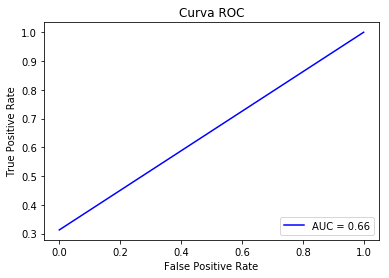

In [34]:
import matplotlib.pyplot as plt

plt.title('Curva ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()